# 非线性回归

## 技术指标

### 相对强弱指标 RSI

RSI是根据一定时期内上涨和下跌幅度之和的比率制作的技术曲线，分析市场买沽盘的意向和实力, 得到未来市场的走势。计算公式如下：  
**`RSI(n) = n日内收盘价涨数平均值 / (n日内收盘价涨数平均值 + n日内收盘价跌幅平均值)*100`**

### 移动平均线 MA

MA是将一段时期内的股票价格平均值连成曲线, 以显示股价的历史波动情况, 反映股价指数未来发展趋势。计算公式如下：  
**`MA(N) = (第1天收盘价 + 第2天收盘价 + …… + 第N天收盘价)/N`**

### 顺势指标CCI

衡量股价是否超出常态分布范围，引入了价格与固定期间的股价平均区间的偏离程度的概念, 强调股价平均绝对偏差在股市技术分析中的重要性。计算公式如下：  
**`CCI(N)=(TP－MA(N))÷MD÷0.015`**，其中：TP =(最高价+最低价+收盘价)/3；MD = 最近N日(MA － 收盘价)的累计之和/N

## 数据处理

指标我们选取**RSI(5)、MA(5)、CCI(5)作为自变量**

### 获取数据（tushare）

In [51]:
import pandas as pd
import numpy as np
import tushare as ts
import matplotlib.pyplot as plt
import talib
import warnings
import datetime
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = 15, 5
%matplotlib inline

In [53]:
# 选取2018-07-02到2018-08-20的数据作为训练集，保证07-02具有CCI(5)、RSI(5)值
# 2018-08-21到2018-09-21的数据作为训练集
df = pd.read_excel('../data/non_data.xlsx')
data = df[['close','high','low','p_change','ma5']]
data.sort_index(inplace=True,ascending=False)
data.reset_index(inplace=True,drop=True)
data.head()

,close,high,low,p_change,ma5
0,6.30,6.42,6.23,-0.63,6.410
1,6.32,6.33,6.15,0.32,6.374
2,6.31,6.33,6.25,-0.16,6.336
3,6.30,6.37,6.28,-0.16,6.314
4,6.44,6.46,6.27,2.22,6.334


### 求解RSI(5)和CCI(5)

In [54]:
# RSI(n) = n日内收盘价涨数平均值 / (n日内收盘价涨数平均值 + n日内收盘价跌幅平均值)*100
data['rsi5'] = talib.RSI(np.array(df['close']), timeperiod=5)
data.head(10)

,close,high,low,p_change,ma5,rsi5
0,6.30,6.42,6.23,-0.63,6.410,NaN
1,6.32,6.33,6.15,0.32,6.374,NaN
2,6.31,6.33,6.25,-0.16,6.336,NaN
3,6.30,6.37,6.28,-0.16,6.314,NaN
4,6.44,6.46,6.27,2.22,6.334,NaN
5,6.36,6.45,6.34,-1.24,6.346,62.500000
6,6.39,6.39,6.27,0.47,6.360,54.054054
7,6.31,6.39,6.25,-1.25,6.360,77.181208
8,6.17,6.30,6.11,-2.22,6.334,85.030270
9,6.36,6.79,6.24,3.08,6.318,85.030270


In [55]:
# CCI(N)=(TP－MA(N))÷MD÷0.015
# TP =(最高价+最低价+收盘价)/3；MD = 最近N日(MA － 收盘价)的累计之和/N
data['cci5'] = talib.CCI(np.array(df['high']),np.array(df['low']),np.array(df['close']), timeperiod=5)
data.head(10)

,close,high,low,p_change,ma5,rsi5,cci5
0,6.30,6.42,6.23,-0.63,6.410,NaN,NaN
1,6.32,6.33,6.15,0.32,6.374,NaN,NaN
2,6.31,6.33,6.25,-0.16,6.336,NaN,NaN
3,6.30,6.37,6.28,-0.16,6.314,NaN,NaN
4,6.44,6.46,6.27,2.22,6.334,NaN,-38.793103
5,6.36,6.45,6.34,-1.24,6.346,62.500000,-87.431694
6,6.39,6.39,6.27,0.47,6.360,54.054054,-9.259259
7,6.31,6.39,6.25,-1.25,6.360,77.181208,88.888889
8,6.17,6.30,6.11,-2.22,6.334,85.030270,101.851852
9,6.36,6.79,6.24,3.08,6.318,85.030270,32.544379


### 划分测试和训练集

In [56]:
data = data[5:]
data.reset_index(inplace=True,drop=True)
data_train = data[:36]
data_test = data[36:]
data_test.reset_index(inplace=True,drop=True)
data_train.head()

,close,high,low,p_change,ma5,rsi5,cci5
0,6.36,6.45,6.34,-1.24,6.346,62.500000,-87.431694
1,6.39,6.39,6.27,0.47,6.360,54.054054,-9.259259
2,6.31,6.39,6.25,-1.25,6.360,77.181208,88.888889
3,6.17,6.30,6.11,-2.22,6.334,85.030270,101.851852
4,6.36,6.79,6.24,3.08,6.318,85.030270,32.544379


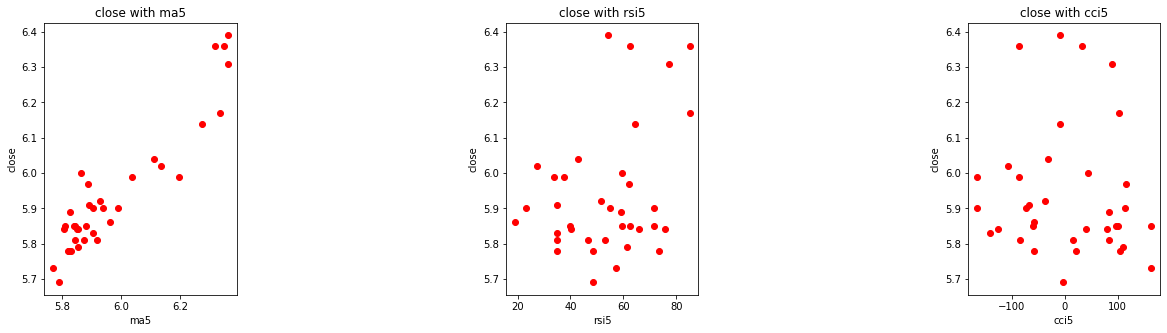

In [57]:
y = list(data_train['close'])
i = 1
plt.figure(facecolor='white',figsize=(20,5))
for index in ['ma5','rsi5','cci5']:
    x = list(data_train[index])
    plt.subplot(1,5,i)
    plt.xlabel(index)
    plt.ylabel('close')
    plt.title('close with ' + index)
    plt.plot(x,y,'or')
    i = i + 2

## 多元线性回归

### 多元线性回归模型

![](../images/lr1.png)

![](../images/lr2.png)

![](../images/lr3.png)

### 模型求解

使用sklearn的LinearRegression函数

In [58]:
model = LinearRegression(fit_intercept=True)
indicators = ['ma5','rsi5','cci5']
X = data_train[indicators]
y = data_train['close']
model.fit(X,y)
predict_close = model.predict(X)
predict_close

array([6.27819353, 6.27486959, 6.31075991, 6.30085803, 6.28843001,
       6.21724547, 6.10743733, 6.03938088, 6.04067241, 5.9629838 ,
       5.90560533, 5.87389291, 5.8813194 , 5.85099558, 5.83675208,
       5.85519672, 5.87712715, 5.90802969, 5.89760206, 5.91213804,
       5.85159339, 5.83968154, 5.83886922, 5.84839848, 5.84733573,
       5.79941088, 5.81043518, 5.81451889, 5.8210205 , 5.85178036,
       5.87119222, 5.81517895, 5.80023841, 5.78065521, 5.77405267,
       5.76614848])

### 结果展示

1. R2 决定系数（拟合优度，方程的变量对y的解释能力）：模型越好：r2→1；模型越差：r2→0
2. 均方差
3. 相关系数

Coefficients: 
 [ 8.65334733e-01  1.63865595e-03 -2.04499800e-05]
Mean squared error: 0.00
Variance score: 0.89


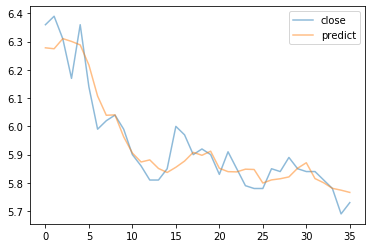

In [59]:
# 指标
print('Coefficients: \n', model.coef_)
print("Mean squared error: %.2f" % mean_squared_error(data_train['close'], predict_close))
print('Variance score: %.2f' % r2_score(data_train['close'], predict_close))

data_train['predict'] = predict_close
data_train[['close','predict']].plot(alpha=0.5)

## 多元非线性回归

**引入ma5、cci5的二次项、rsi5的对数项、ma5的三次项，按线性回归求解即可**

In [60]:
data_train['ma5_2'] = np.power(data_train['ma5'],2)
data_train['cci5_2'] = np.power(data_train['cci5'],2)
data_train['rsi5_2'] = np.power(data_train['rsi5'],2)
data_train['rsi5_log'] = np.log(data_train['rsi5'])
data_train['rsi5_3'] = np.power(data_train['rsi5'],3)
data_train.head()

,close,high,low,p_change,ma5,rsi5,cci5,predict,ma5_2,cci5_2,rsi5_2,rsi5_log,rsi5_3
0,6.36,6.45,6.34,-1.24,6.346,62.500000,-87.431694,6.278194,40.271716,7644.301114,3906.250000,4.135167,244140.625000
1,6.39,6.39,6.27,0.47,6.360,54.054054,-9.259259,6.274870,40.449600,85.733882,2921.840760,3.989985,157937.338361
2,6.31,6.39,6.25,-1.25,6.360,77.181208,88.888889,6.310760,40.449600,7901.234568,5956.938877,4.346156,459763.738800
3,6.17,6.30,6.11,-2.22,6.334,85.030270,101.851852,6.300858,40.119556,10373.799726,7230.146761,4.443007,614781.328884
4,6.36,6.79,6.24,3.08,6.318,85.030270,32.544379,6.288430,39.917124,1059.136585,7230.146761,4.443007,614781.328884


### 模型求解

In [62]:
model = LinearRegression(fit_intercept=True)
indicators = ['ma5','rsi5_log','cci5','ma5_2','cci5_2']
X = data_train[indicators]
y = data_train['close']
model.fit(X,y)
non_predict_close = model.predict(X)
non_predict_close

array([6.29007936, 6.30588695, 6.31361933, 6.28831839, 6.28820672,
       6.22858733, 6.07649769, 6.02713313, 6.04694473, 5.9585968 ,
       5.86446306, 5.86716025, 5.89392172, 5.85501705, 5.83638731,
       5.86508121, 5.86457426, 5.88755418, 5.90587689, 5.91192348,
       5.83535081, 5.84942845, 5.8514219 , 5.84236791, 5.83799774,
       5.82316581, 5.8146892 , 5.82198442, 5.82833469, 5.81701357,
       5.8718691 , 5.81167305, 5.81148198, 5.80113117, 5.80342194,
       5.75283842])

### 结果展示

Coefficients: 
 [-2.98868118e+00  6.28634843e-02 -2.26504182e-05  3.17737985e-01
 -1.59103114e-06]
Mean squared error: 0.00
Variance score: 0.89


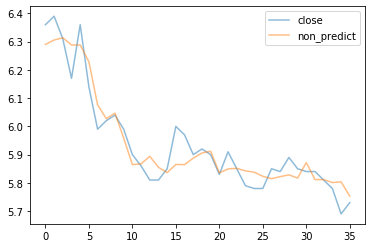

In [63]:
# 指标
print('Coefficients: \n', model.coef_)
print("Mean squared error: %.2f" % mean_squared_error(data_train['close'], non_predict_close))
print('Variance score: %.2f' % r2_score(data_train['close'], non_predict_close))

data_train['non_predict'] = non_predict_close
data_train[['close','non_predict']].plot(alpha=0.5)